In [ ]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'  # carpeta donde se encuentran los datasets
else:
    DATOS_DIR   = '../Datos/' # carpeta LOCAL donde se encuentran los datasets

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet

In [ ]:
nomArch = DATOS_DIR+'Premios2020.csv'
#-- detectando la codificación de caracteres usada ----
with open(nomArch, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

df= pd.read_csv(nomArch, encoding=result['encoding'])
df

,Year,Age,Actor,Sex,Film,nominations,rating,duration,genre1,genre2,release,synopsis
0,1928,44,Emil Jannings,M,The Last Command,2.0,8.0,88,Drama,History,April,A former Imperial Russian general and cousin o...
1,1928,22,Laura Gainor (aka Janet Gaynor),F,Sunrise,5.0,7.8,110,Drama,Romance,NaN,A street cleaner saves a young womans life and...
2,1929,37,Mary Pickford,F,Coquette,1.0,7.3,76,Drama,Romance,April,A flirtatious southern belle is compromised wi...
3,1929,38,Warner Baxter,M,In Old Arizona,5.0,5.8,95,Romance,Western,January,A charming happy-go-lucky bandit in old Arizon...
4,1930,62,George Arliss,M,Disraeli,3.0,6.5,90,Biography,Drama,November,Prime Minister of Great Britain Benjamin Disra...
...,...,...,...,...,...,...,...,...,...,...,...,...
181,2018,44,Olivia Colman,F,The Favourite,10.0,7.5,119,Comedy,Drama,December,In the early 18th century England is at war wi...
182,2019,50,Renée Zellweger,F,Judy,2.0,6.8,118,Biography,Drama,February,"Thirty years after starring in ""The Wizard of ..."
183,2019,45,Joaquin Phoenix,M,Joker,11.0,8.5,122,Drama,Thriller,October,Arthur Fleck loves to make people laugh but hi...
184,2020,63,Frances McDormand,F,Nomadland,6.0,7.4,108,Drama,NaN,September,Nomadland es una película estadounidense de dr...


# Datos faltantes

In [ ]:
print(df.isnull().sum())

Year            0
Age             0
Actor           0
Sex             0
Film            0
nominations     8
rating          0
duration        0
genre1          0
genre2         37
release         4
synopsis        0
dtype: int64


**Completando datos faltantes**

In [ ]:
values = {'nominations': df['nominations'].min(), 'rating': 5}
df.fillna(value=values, inplace=True)
df.isnull().sum()

,0
Year,0
Age,0
Actor,0
Sex,0
Film,0
nominations,0
rating,0
duration,0
genre1,0
genre2,37


In [ ]:
modaGen = df['genre2'].mode()[0]

print("La MODA del atributo 'genre2' es ", modaGen)

df['genre2'] = df['genre2'].replace(np.nan, modaGen)
df.isnull().sum()


La MODA del atributo 'genre2' es  Drama


,0
Year,0
Age,0
Actor,0
Sex,0
Film,0
nominations,0
rating,0
duration,0
genre1,0
genre2,0


## Ejercicio

Reemplace los 4 casos en los que el atributo *release* no tiene valor por 'January'

# Reducción de valores

In [ ]:
opciones = df['genre1'].value_counts()
opciones

,count
genre1,
Drama,91
Biography,41
Comedy,25
Crime,16
Adventure,6
Action,3
Romance,2
Mystery,1
Thriller,1


In [ ]:
# Reemplazando valores
df['genre1'] = df['genre1'].replace(['Adventure','Action', \
              'Romance', 'Thriller', 'Mystery'], 'Otra')

# revisar cómo quedó
opciones2 = df['genre1'].value_counts()
opciones2

,count
genre1,
Drama,91
Biography,41
Comedy,25
Crime,16
Otra,13


# Generando un nuevo atributo

In [ ]:
LD = ['NO'] * len(df)
for i in range(len(df)):
    if df['duration'][i] > 120:
        LD[i] = 'SI'
# Agregando un atributo al DataFrame
df = df.assign( largaDuracion = LD )

print('Atributo largaDuracion')
print(df['largaDuracion'].value_counts)


Atributo largaDuracion
<bound method IndexOpsMixin.value_counts of 0      NO
1      NO
2      NO
3      NO
4      NO
       ..
181    NO
182    NO
183    SI
184    NO
185    NO
Name: largaDuracion, Length: 186, dtype: object>


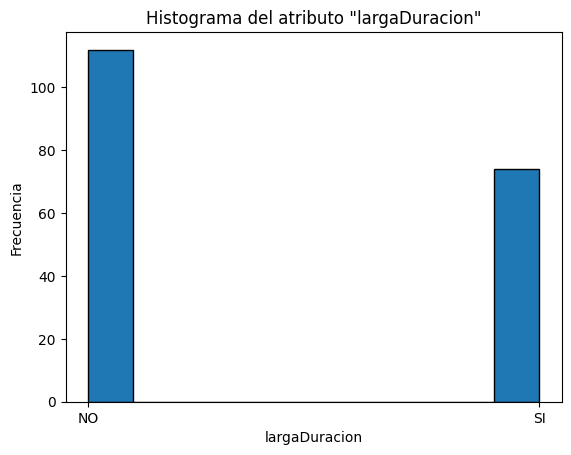

In [ ]:
plt.figure()
plt.hist(df['largaDuracion'], bins = 10, edgecolor = 'black', \
         linewidth=1)
plt.xlabel('largaDuracion')
plt.ylabel('Frecuencia')
plt.title('Histograma del atributo "largaDuracion"')
plt.show()